# Notebook Imports


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading Data

In [10]:
df = pd.read_csv("cleaned_data.csv", index_col = 0)
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [11]:
corr = df.corr()

<AxesSubplot:>

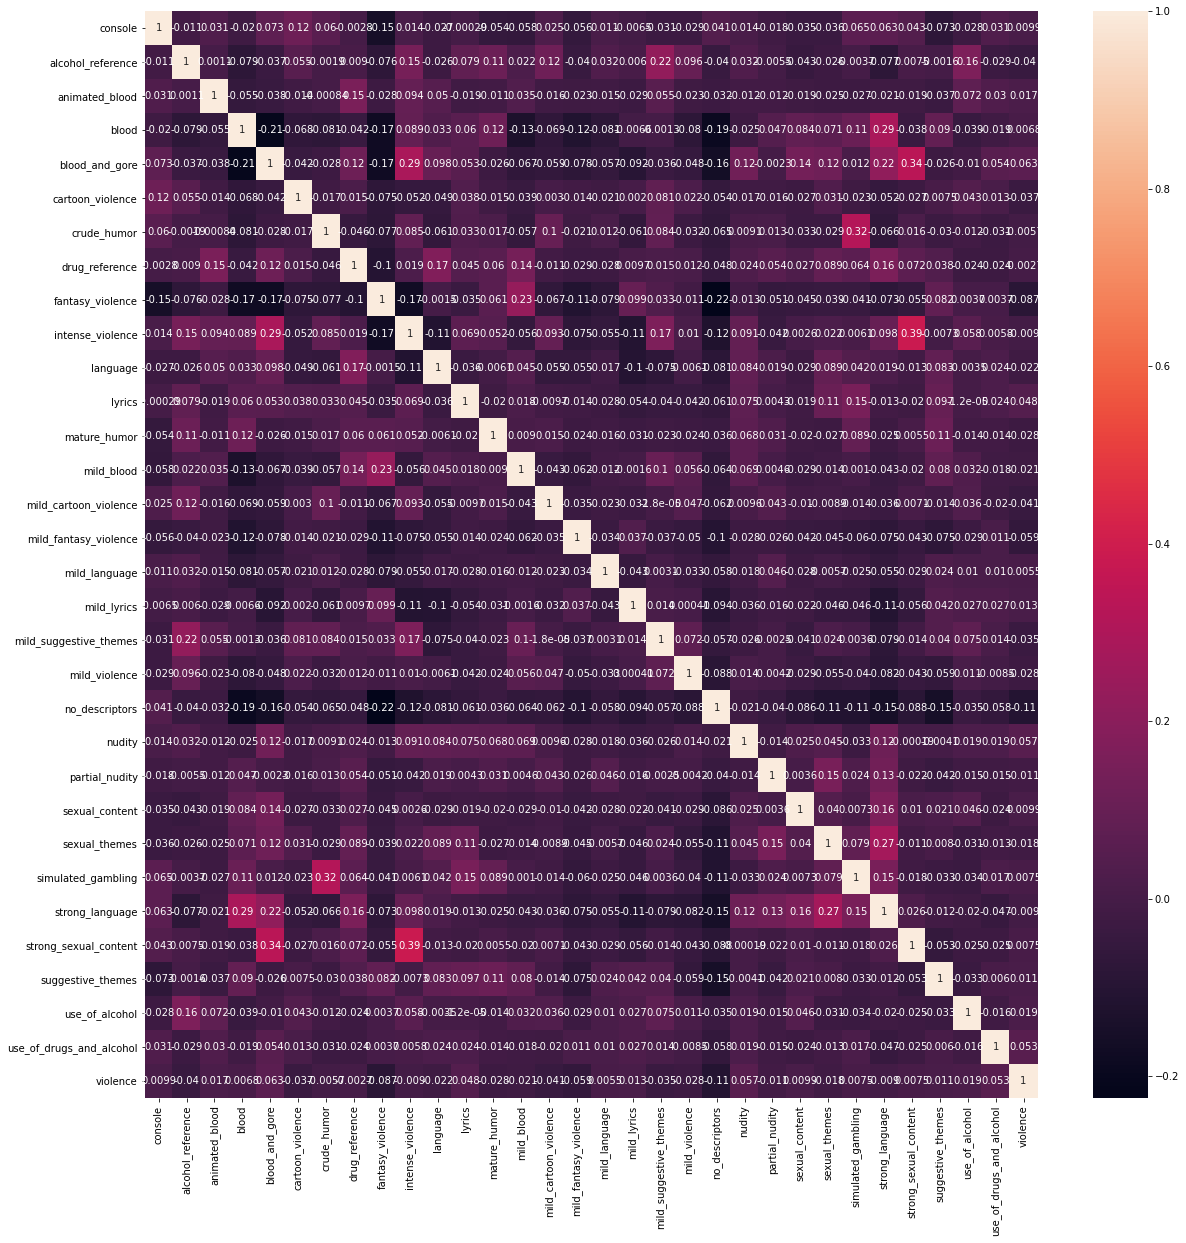

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)


# Splitting Dataset


In [14]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)
df

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,3
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [17]:
train_X = df.loc[:, df.columns != "esrb_rating"]
train_Y = df[["esrb_rating"]]
train_Y


,esrb_rating
0,0
1,1
2,3
3,1
4,2
...,...
1890,3
1891,2
1892,0
1893,2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
# train the model
knn.fit(train_X, train_Y)
# get the predict value from X_test
# y_pred = knn.predict(X_test)
# print the score
# print('accuracy: ', knn.score(X_test, y_test))
# accuracy:  0.973684210526


ValueError: could not convert string to float: 'Monster Jam Steel Titans 2'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
# from sklearn.cross_validation import cross_val_score
sk_kays = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
man_sk = {}
euc_sk = {}
# print(x_train.shape)
kfold = KFold(n_splits=5, shuffle=False)
for k in sk_kays:
  print(k)
  knn_man = KNeighborsClassifier(n_neighbors=k, p=1)
  knn_euc = KNeighborsClassifier(n_neighbors=k, p=2)
  pred_man = np.array([])
  pred_euc = np.array([])
  for train, test in kfold.split(x_train):
    # euc_scores.append(x_train[train])
    # k_scores.append(x_train[test])
    test_data = x_train[test]
    train_data = x_train[train]
    train_labels = y_train[train]
    test_labels = y_train[test]
    knn_man.fit(train_data, train_labels)
    knn_euc.fit(train_data, train_labels)
    pred_man = np.append(pred_man, knn_man.predict(test_data))
    pred_euc = np.append(pred_euc, knn_euc.predict(test_data))
  man_sk[k] = pred_man
  euc_sk[k] = pred_euc
